In [1]:
%load_ext autoreload
%autoreload 2

from parser import get_args_parser, set_paths
from vrgaze import vrGazeCore

import numpy as np

import glob
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os, sys

# Set directories

In [2]:
base_dir = '/Users/thomasbotch/Dropbox/Projects/vrGazeCore-Toolbox/python/data/'

subject_fn = 'furrow380_V1.txt'

# Set args to be parsed

In [3]:
args = [
    f'--project_dir={base_dir}',
    f'--raw_data_folder=rawData',
    f'--stim_folder=stimuli/combined/',
    f'--plot_fixations',
    f'--plot_density_maps',
    f'--heatmap_timesteps=2',
]

In [4]:
parser = get_args_parser()

params = parser.parse_args(args)
paths = set_paths(params)

Check that the following paths are correct:
project_raw_data_dir = /Users/thomasbotch/Dropbox/Projects/vrGazeCore-Toolbox/python/data/rawData
project_stim_dir = /Users/thomasbotch/Dropbox/Projects/vrGazeCore-Toolbox/python/data/stimuli/combined/
Are the paths correct?
1 = Yes
2 = No
Enter:1


In [5]:
vrGaze = vrGazeCore(params, paths)

raw_data = vrGaze.loadRawData(subject_fn)
raw_data = vrGaze.processRawData(raw_data)
parsed_data = vrGaze.parseTrials(raw_data)

Averaging coordinates from both eyes!


# Run vrGazeCore on the set of all trials

In [6]:
import time
print(f'Running {len(parsed_data)} trials')

start_time = time.time()

for trial in parsed_data:
    
    trial = vrGaze.runFindFixations(trial)
    trial.write_data(out_dir=trial.paths['project_fix_pkl_dir'])
    
    print (time.time() - start_time)

Running 124 trials
CONFIDENCE FILTER - percent removed: 4.08%
ECCENTRICITY FILTER - percent removed: 0.00%
FIXATION CONCATENATION: concatenated 4 out of 74 fixations
FIXATION TRIM FILTER - removed 1 out of 70 fixations
FIXATION DURATION FILTER - removed 8 out of 69 fixations

FIXATION STATISTICS
Num fixations: 61
Avg fixation duration: 0.929 seconds
STD fixation duration: 1.139 seconds
Min fixation duration: 0.100 seconds
Max fixation duration: 4.681 seconds
No image path provided!
2.099909782409668
CONFIDENCE FILTER - percent removed: 7.67%
ECCENTRICITY FILTER - percent removed: 0.00%
FIXATION CONCATENATION: concatenated 1 out of 48 fixations
FIXATION TRIM FILTER - removed 1 out of 47 fixations
FIXATION DURATION FILTER - removed 21 out of 46 fixations

FIXATION STATISTICS
Num fixations: 25
Avg fixation duration: 0.263 seconds
STD fixation duration: 0.208 seconds
Min fixation duration: 0.106 seconds
Max fixation duration: 0.963 seconds
No image path provided!
2.2390739917755127
CONFIDE


KeyboardInterrupt



In [7]:
trial = vrGaze.runFindFixations(parsed_data[16])

CONFIDENCE FILTER - percent removed: 10.17%
ECCENTRICITY FILTER - percent removed: 0.00%
FIXATION CONCATENATION: concatenated 0 out of 49 fixations
FIXATION TRIM FILTER - removed 1 out of 49 fixations
FIXATION DURATION FILTER - removed 24 out of 48 fixations

FIXATION STATISTICS
Num fixations: 24
Avg fixation duration: 0.231 seconds
STD fixation duration: 0.144 seconds
Min fixation duration: 0.104 seconds
Max fixation duration: 0.588 seconds


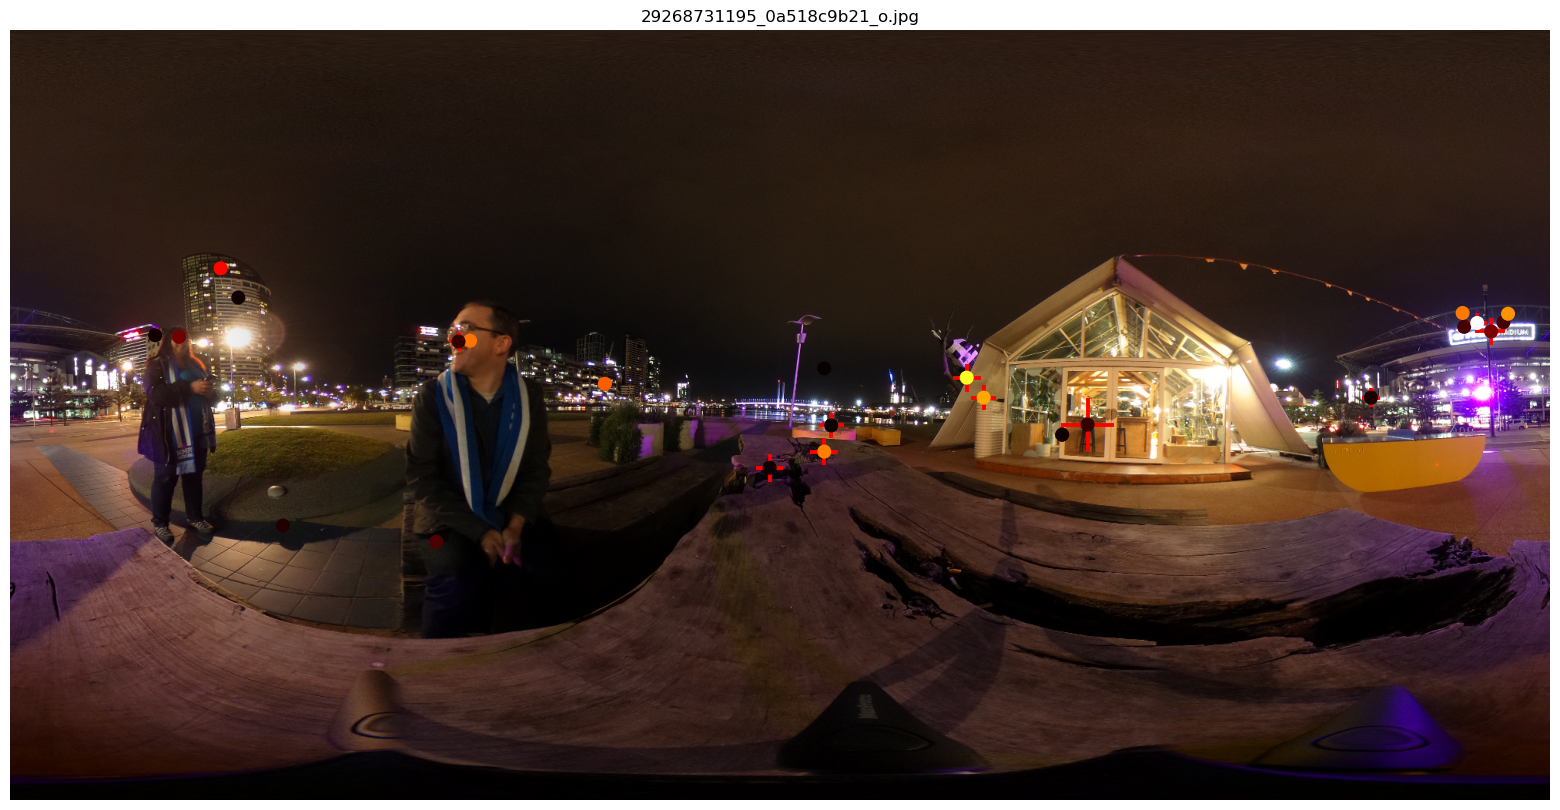

In [15]:
image_path = trial.get_image_path()

vrGaze.plotFixations(trial.get_fixations(), image_path)

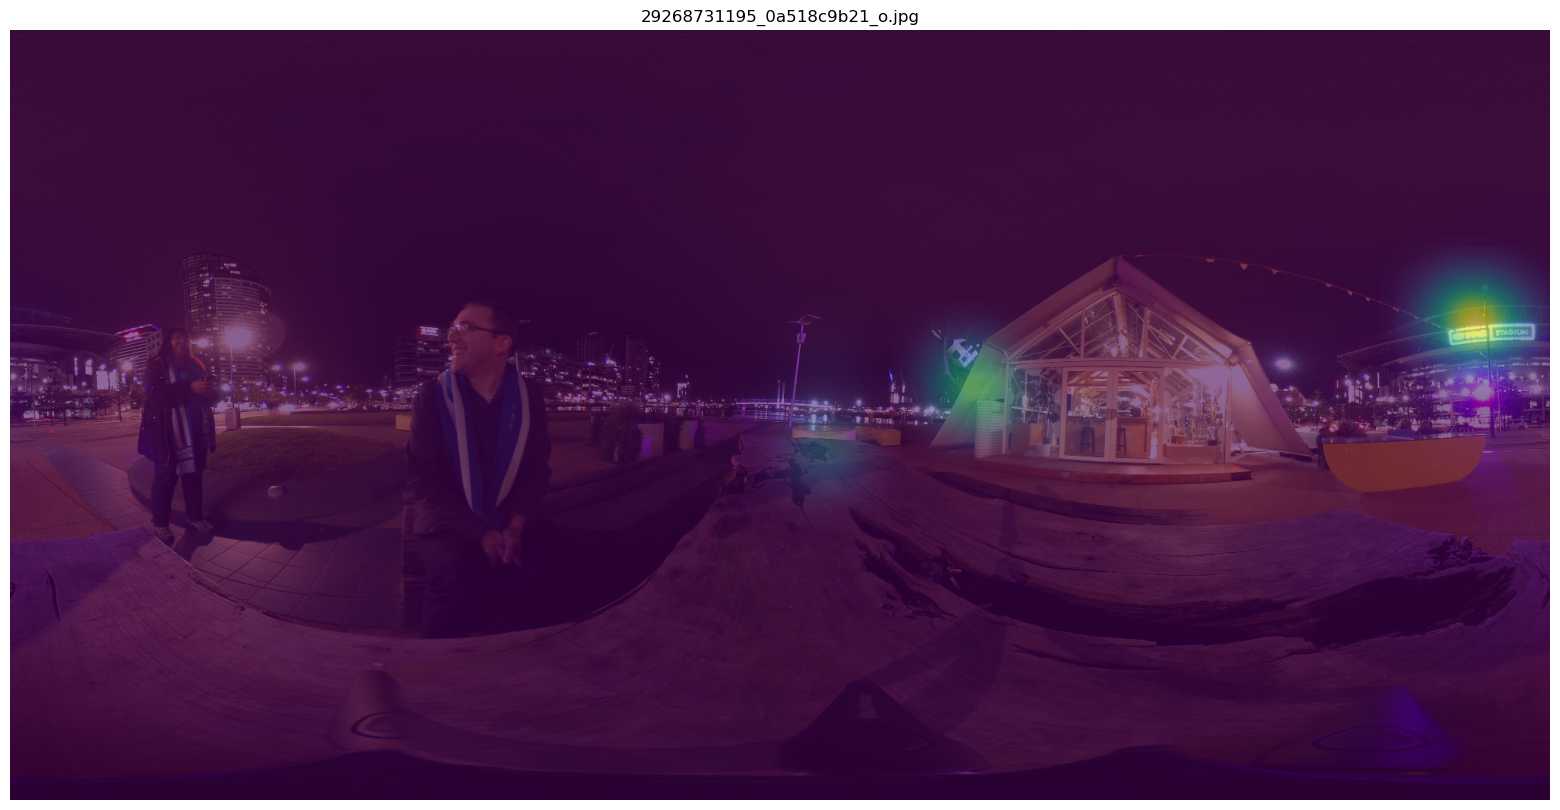

In [12]:
image_path = trial.get_image_path()

split_timecourse = vrGaze.splitFixationTimesteps(trial.get_fixations())
density_map = vrGaze.createDensityMap(split_timecourse[0])
vrGaze.plotFixationDensity(density_map, image_path)

# We can also do this with dataframe

In [ ]:

trial = parsed_data[trial_number].get_raw_data()

# first run the confidence filter
confidence_filter, percent_removed = vrGaze.confidenceFilter(trial)

# trial.set_confidence_filter(confidence_filter)

# ADD CONFIDENCE FLAG HERE

# next eccentricity filter
# RUN ECCENTRICITY FLAG HERE

eccentricity_filter, percent_removed = vrGaze.eccentricityFilter(trial)

# trial.set_eccentricity_filter(eccentricity_filter)

# 

# Maps eye coordinates on screen to FOV, roll to radians
preproc = vrGaze.preprocessTrialData(trial)

# Connects head and eye position to create gaze on sphere
# ONLY NECESSARY IF EYETRACKING
# rectified = vrGaze.rectifyGaze(preproc)

sys.exit(0)

trial_filtered = trial.loc[~np.logical_or(confidence_filter, eccentricity_filter)]
trial_filtered = trial_filtered.loc[1:]


trial_fixations = vrGaze.calculateFixations(trial_filtered)


trial_name = sorted(trial['trial'].unique())[0]
image_path = glob.glob(os.path.join(vrGaze.paths['project_stim_dir'], f'{trial_name}*'))[0]

# plt.colorbar(orientation="horizontal")
# TODO: Wrap points Equirect 
## INSERT WRAP POINTS

# TODO: Bilateral filtering
# INSERT BILATERAL FILTERING

# TODO: Interpolation
## INSERT INTERPOLATION

In [ ]:
vrGaze.plotFixations(trial_fixations, image_path)

In [ ]:
density_map = vrGaze.createDensityMap(trial_fixations)
vrGaze.plotFixationDensity(density_map, image_path)

In [ ]:
trial_fixations

In [ ]:
timesteps = vrGaze.splitFixationTimesteps(trial_fixations)



In [ ]:
density_map = vrGaze.createDensityMap(timesteps[3])
vrGaze.plotFixationDensity(density_map, image_path)

# General vrGazeCore pipeline is as follows:

1. Load data
2. Select columns from data used in analysis
    - MATLAB fx: processRawData
    - Python fx: processRawData
3. Parse data into trials (Python specific):
    - Create a dictionary of trial level meta data
    
3. Confidence filter
    - MATLAB fx: 

In [ ]:
np.sin(np.deg2rad(180))

In [ ]:
from matplotlib import pyplot as plt
plt.plot(mad_velocity)

In [ ]:
velocity.shape